In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

In [52]:
data = pd.read_csv('chess_games_small_features.csv')
data.head(10)

,result,material_balance
0,1-0,0
1,1-0,1
2,1-0,1
3,1-0,5
4,1-0,5
5,0-1,0
6,0-1,0
7,0-1,0
8,0-1,-2
9,1-0,0


<Axes: >

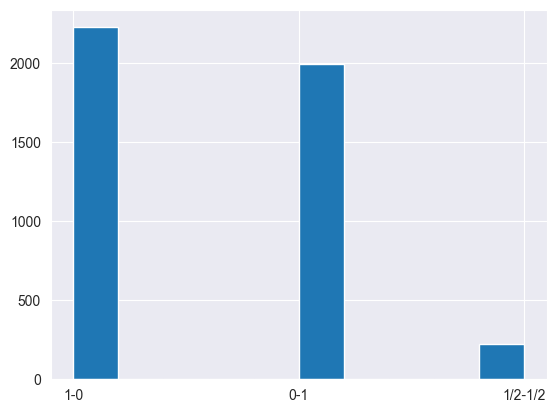

In [53]:
data['result'].hist()

In [54]:
data = data[["material_balance", "result"]]
data.head(10)

,material_balance,result
0,0,1-0
1,1,1-0
2,1,1-0
3,5,1-0
4,5,1-0
5,0,0-1
6,0,0-1
7,0,0-1
8,-2,0-1
9,0,1-0


<Axes: xlabel='material_balance', ylabel='Count'>

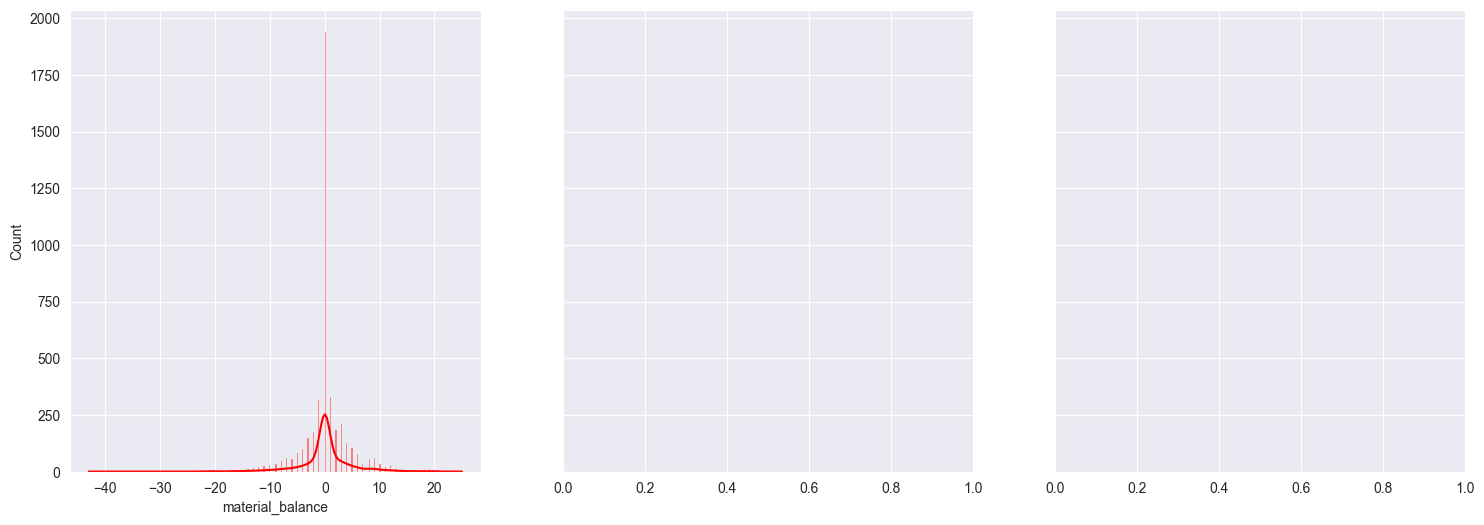

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(18,6), sharey=True)
sns.histplot(data, ax=axes[0], x="material_balance", kde=True, color='r')

In [56]:
def calculate_prior(df,Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior


In [57]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [58]:
def naive_bayes_guassian(df, X, Y):

    features = list(df.columns)[:-1]

    prior = calculate_prior(df, Y)

    Y_pred = []

    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1] * len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])
        
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        
        Y_pred.append(labels[np.argmax(post_prob)])

    return np.array(Y_pred)

In [59]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_guassian(train, X=X_test, Y='result')

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print('F1 Score: ', f1_score(Y_test, Y_pred, average='weighted'))

[[142 275   0]
 [ 37 385   0]
 [  5  45   0]]
F1 Score:  0.5459781350565747
